In [1]:
import tensorflow as tf
from tensorflow import keras
 #Below is the dataset we'll be using
from tensorflow.keras.datasets import fashion_mnist
 #The type of model we'll be using
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# from tensorflow.keras.datasets import fashion_mnist  # The dataset we'll be using
# from tensorflow.keras.models import Sequential  # The type of model we'll be using
# from tensorflow.keras.layers import Dense, Flatten  # The layers we'll be using in our model
# from tensorflow.keras.utils import to_categorical  # A utility function to convert labels into one-hot format


# Load CIFAR-10 dataset
#(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
len(train_labels)
len(train_images)

60000

In [7]:
len(test_labels)

10000

## Preprocessing of data

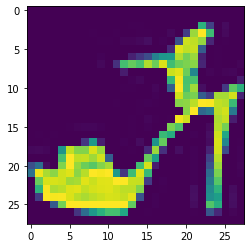

In [12]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.gca().grid(False)

In [9]:
train_images=train_images/255.0
test_images=test_images/255.0

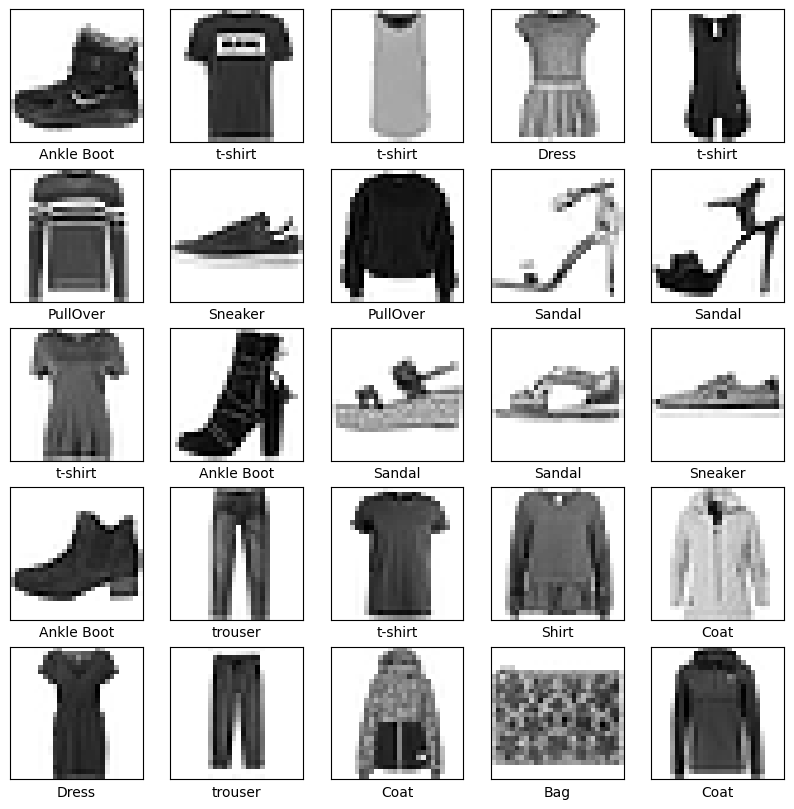

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    

## Build the Model

In [11]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(130,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
    
])

In [12]:
train_images.shape

(60000, 28, 28)

## Compile the model

In [31]:
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy', # Loss
              metrics=['accuracy'])

In [79]:
#opt = keras.optimizers.Adam(learning_rate=0.05)
#model.compile(loss='sparse_categorical_crossentropy', optimizer=opt)


In [80]:
#tf.keras.metrics.CategoricalAccuracy(name="sparse_categorical_accuracy", dtype=None)

## Train the model

In [32]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2514 - accuracy: 0.9070
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2431 - accuracy: 0.9097
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2399 - accuracy: 0.9115
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2374 - accuracy: 0.9119
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2356 - accuracy: 0.9125


## Evaluation of accuracy

In [33]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Test Accuracy',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3231 - accuracy: 0.8865
Test Accuracy 0.8865000009536743


## Prediction

In [34]:
predictions=model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [35]:
predictions[0]

array([5.9328481e-06, 3.3846476e-08, 3.5953616e-07, 9.9867827e-07,
       1.0994895e-06, 2.9931564e-03, 2.4370325e-05, 1.8737994e-02,
       1.7402574e-05, 9.7821879e-01], dtype=float32)

In [36]:
np.argmax(predictions[0])

9

In [37]:
test_labels[0]

9

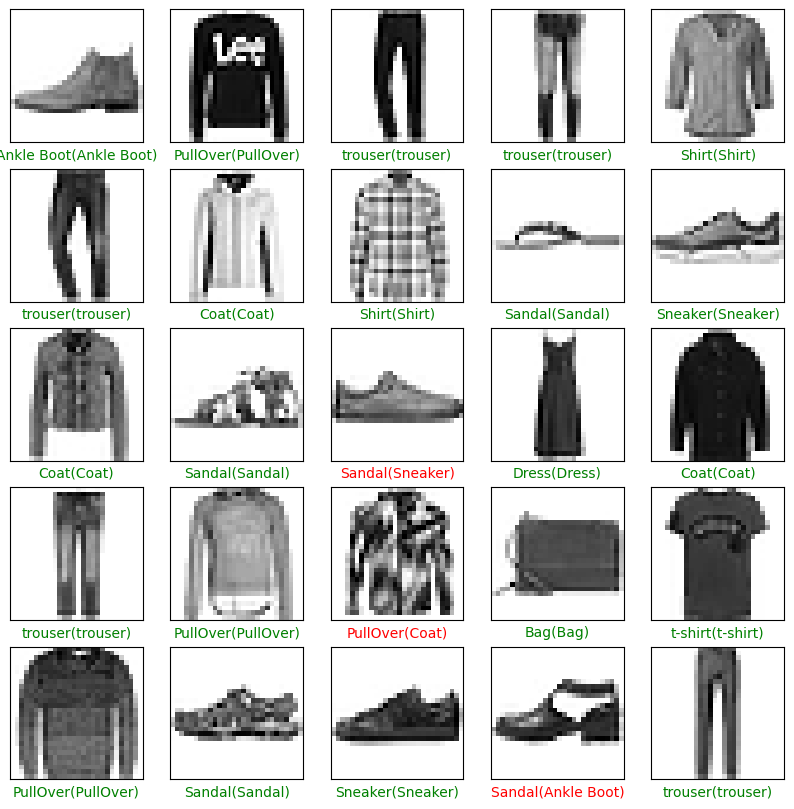

In [38]:
# Colour correct prediction in green and wrong prediction in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    predicted_label=np.argmax(predictions[i])
    true_label=test_labels[i]
    if predicted_label==true_label:
        color='green'
    else:
        color='red'
    plt.xlabel("{}({})".format(class_names[predicted_label],
                               class_names[true_label]),
                               color=color)
    
        
    
    


In [22]:
#Image from test dataset
print(test_images[0].shape)

(28, 28)


In [27]:
#Add the image to a batch where it's the only member
img=np.expand_dims(test_images[0],0)
print(np.expand_dims(test_images[0],0).shape)

(1, 28, 28)


In [28]:
#Predict the image
print(model.predict(img))

1/1 [==============================] - 0s 32ms/step
[[2.3158577e-06 4.1268052e-08 1.2667080e-07 3.2608889e-07 8.7646401e-07
  2.7390996e-03 3.0010267e-06 4.0272870e-03 5.1307470e-06 9.9322188e-01]]


In [30]:
prediction=predictions[0]
np.argmax(prediction)

9